# **Data Collection and Preprocessing** <br>
**Banking Customer Churn (raw data)** <br>
This dataset contains information about bank customers and their churn status, which indicates whether they have exited the bank or not.

In [336]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.pipeline import Pipeline

path = "./data/Churn_Modelling.csv"
raw_data = pd.read_csv(path)
raw_data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


**Raw data check null value**

In [279]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [280]:
raw_data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**Ignore unused columns** <br>
For this analysis, the column "RowNumber", "CustomerId", "Balance", "Surname" will not be taken into consideration for our analysis

In [281]:
data = raw_data.drop(["RowNumber", "CustomerId", "Surname"], axis=1)
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# **General visualizations**
- The subsequent graphs aid in gaining a clearer understanding of the features by displaying the distribution of each feature separately. This provides insight into the variation and likelihood associated with each feature before delving deeper into the analysis.<br>
- To facilitate data comprehension, only the initial 50 entries will be considered for this visualization. <br>
- This method emulates the selection of a sample comprising 50 values from the entire dataset. While the outcome may vary, the fundamental steps of this process remain consistent, with the exception of the input data.

In [282]:
visualizing_data = data[:50]
visualizing_data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


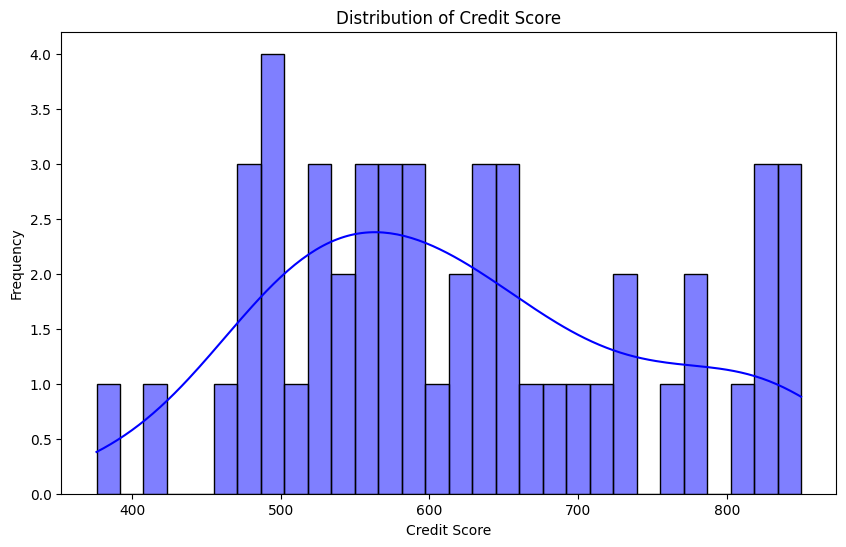

In [283]:
plt.figure(figsize=(10, 6))
sns.histplot(visualizing_data['CreditScore'], kde=True, color='blue', bins=30)
plt.title('Distribution of Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

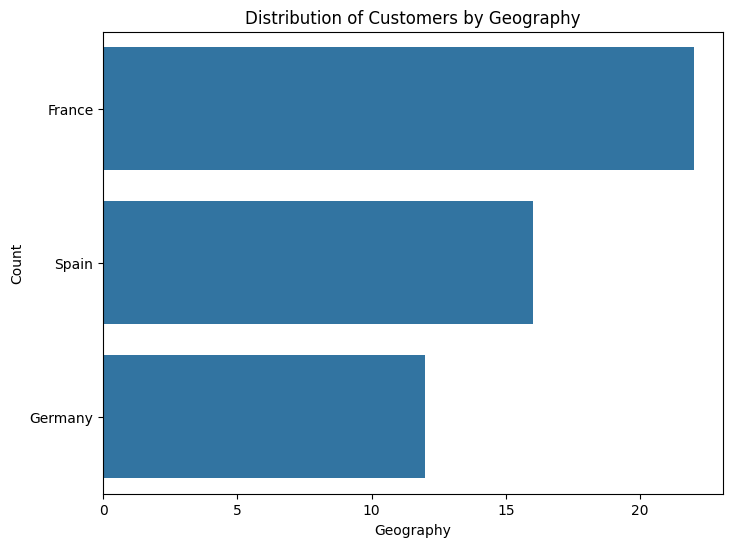

In [284]:
plt.figure(figsize=(8, 6))
sns.countplot(visualizing_data['Geography'])
plt.title('Distribution of Customers by Geography')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.show()

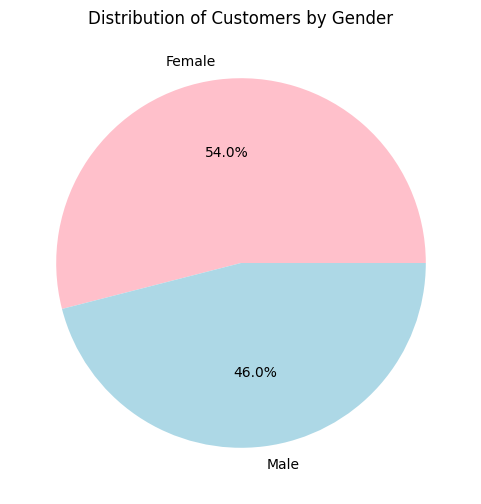

In [285]:
plt.figure(figsize=(6, 6))
visualizing_data['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['pink', 'lightblue'])
plt.title('Distribution of Customers by Gender')
plt.ylabel('')
plt.show()

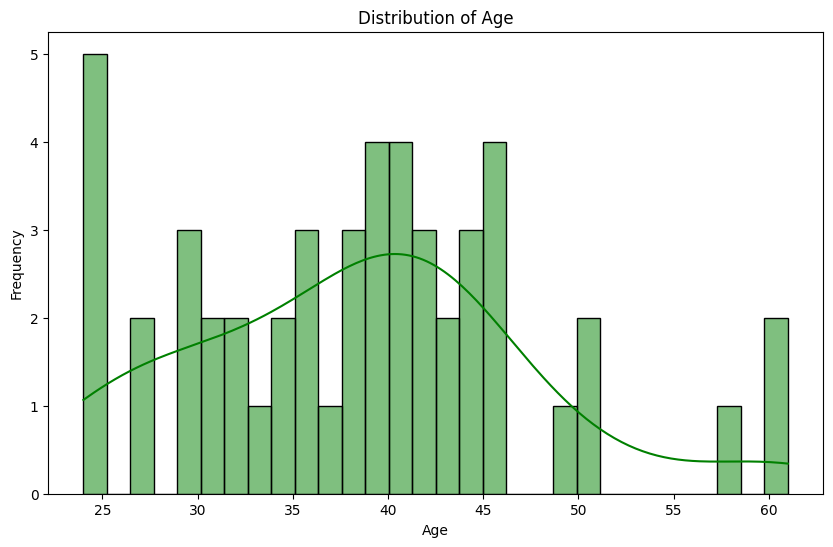

In [286]:
plt.figure(figsize=(10, 6))
sns.histplot(visualizing_data['Age'], kde=True, color='green', bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

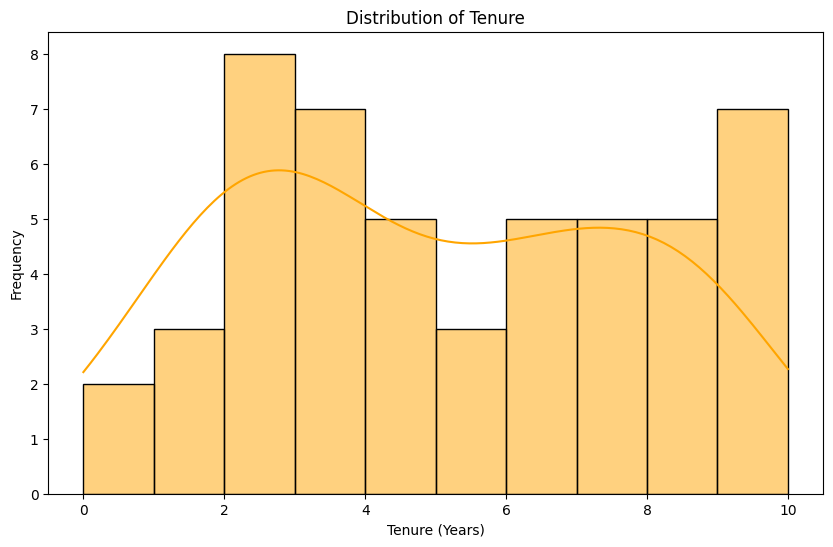

In [287]:
plt.figure(figsize=(10, 6))
sns.histplot(visualizing_data['Tenure'], kde=True, color='orange', bins=10)
plt.title('Distribution of Tenure')
plt.xlabel('Tenure (Years)')
plt.ylabel('Frequency')
plt.show()

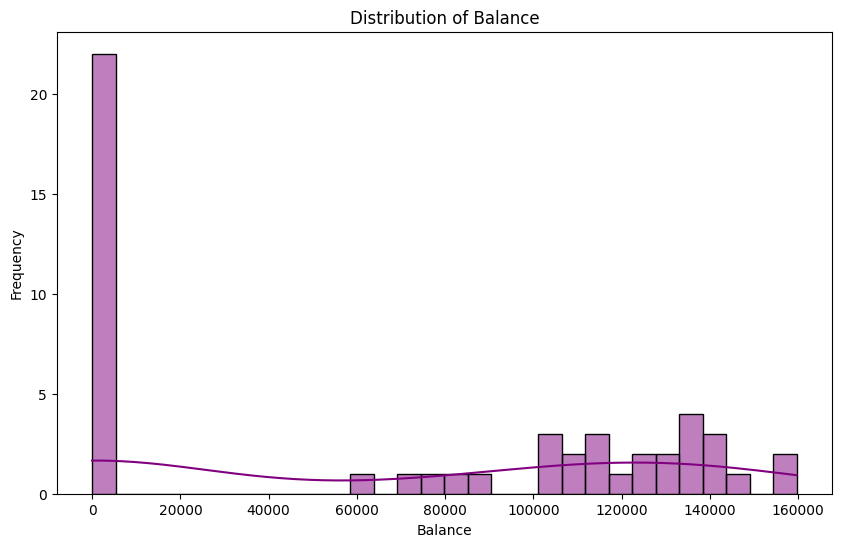

In [288]:
plt.figure(figsize=(10, 6))
sns.histplot(visualizing_data['Balance'], kde=True, color='purple', bins=30)
plt.title('Distribution of Balance')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

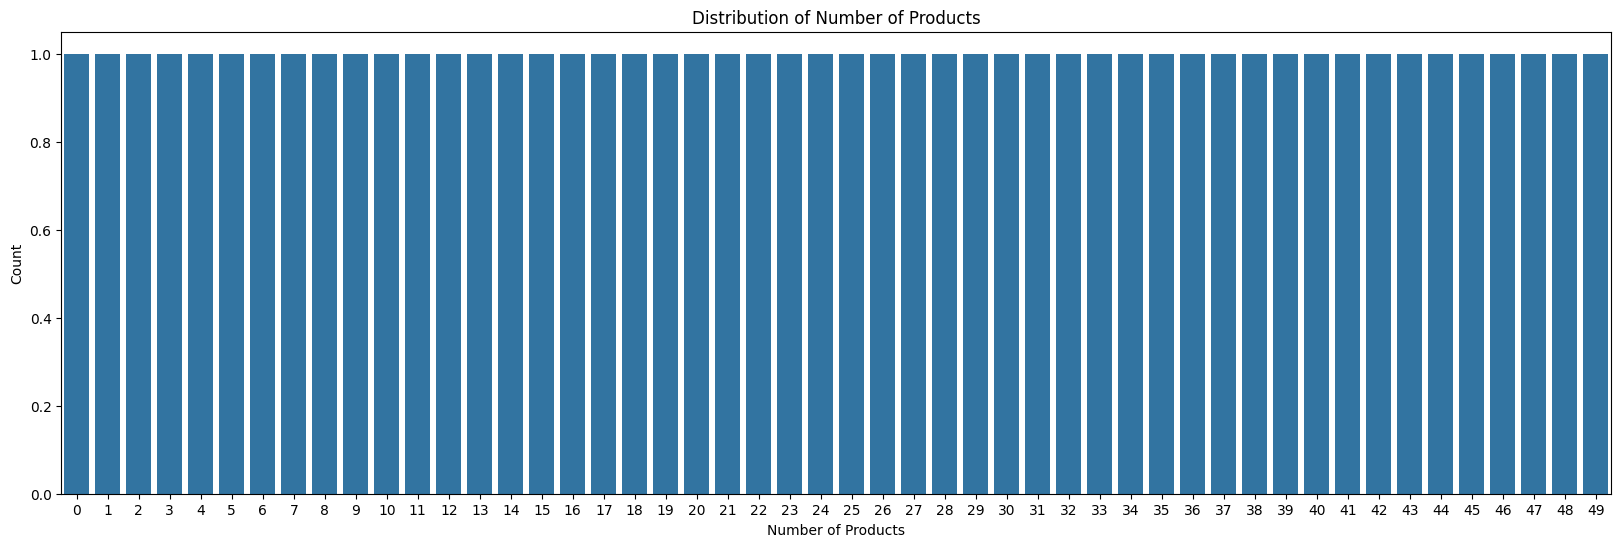

In [289]:
plt.figure(figsize=(20, 6))
sns.countplot(visualizing_data['NumOfProducts'])
plt.title('Distribution of Number of Products')
plt.xlabel('Number of Products')
plt.ylabel('Count')
plt.show()

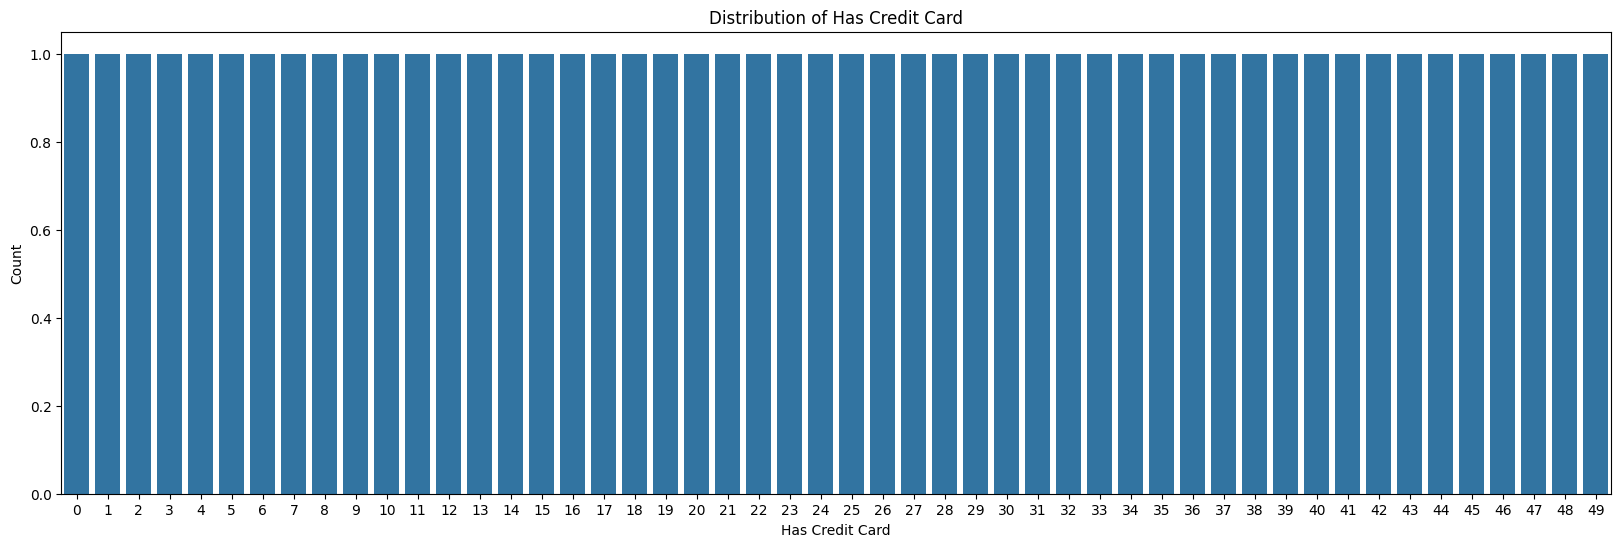

In [290]:
plt.figure(figsize=(20, 6))
sns.countplot(visualizing_data['HasCrCard'])
plt.title('Distribution of Has Credit Card')
plt.xlabel('Has Credit Card')
plt.ylabel('Count')
plt.show()

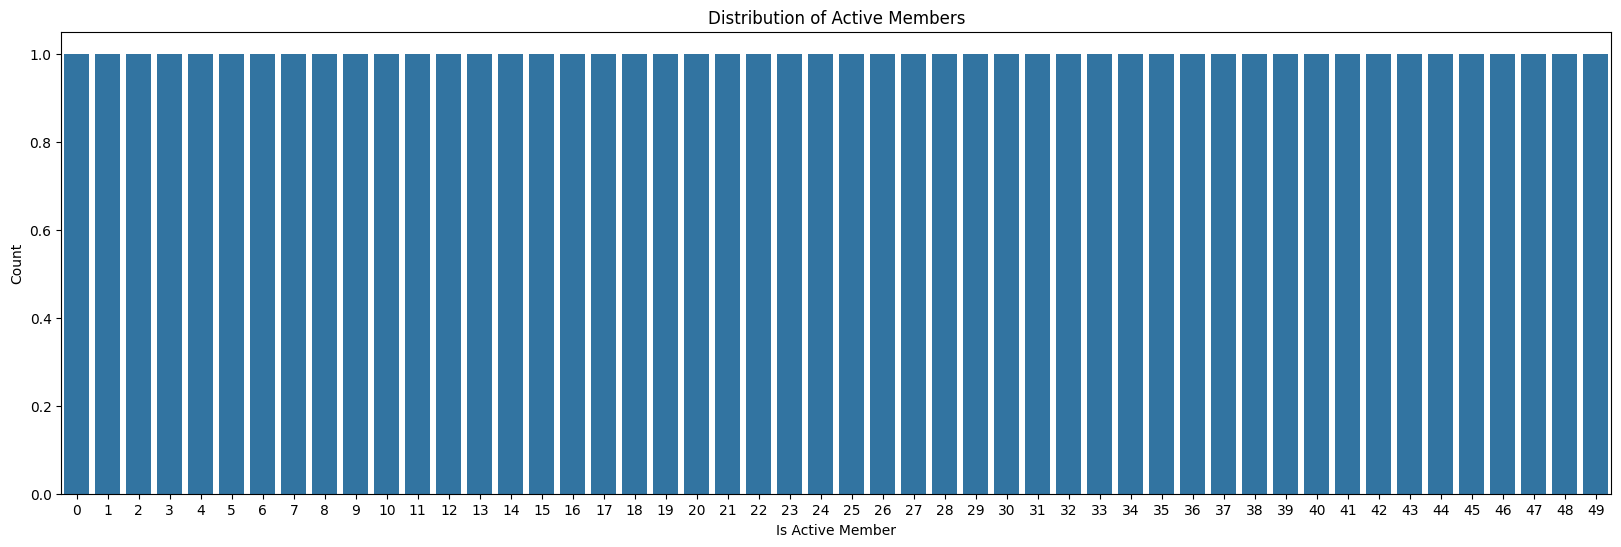

In [291]:
plt.figure(figsize=(20, 6))
sns.countplot(visualizing_data['IsActiveMember'])
plt.title('Distribution of Active Members')
plt.xlabel('Is Active Member')
plt.ylabel('Count')
plt.show()

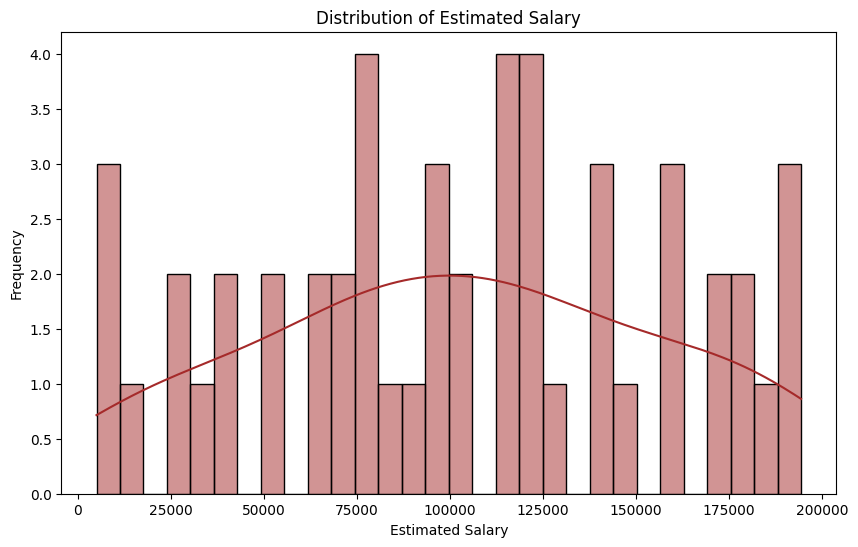

In [292]:
plt.figure(figsize=(10, 6))
sns.histplot(visualizing_data['EstimatedSalary'], kde=True, color='brown', bins=30)
plt.title('Distribution of Estimated Salary')
plt.xlabel('Estimated Salary')
plt.ylabel('Frequency')
plt.show()

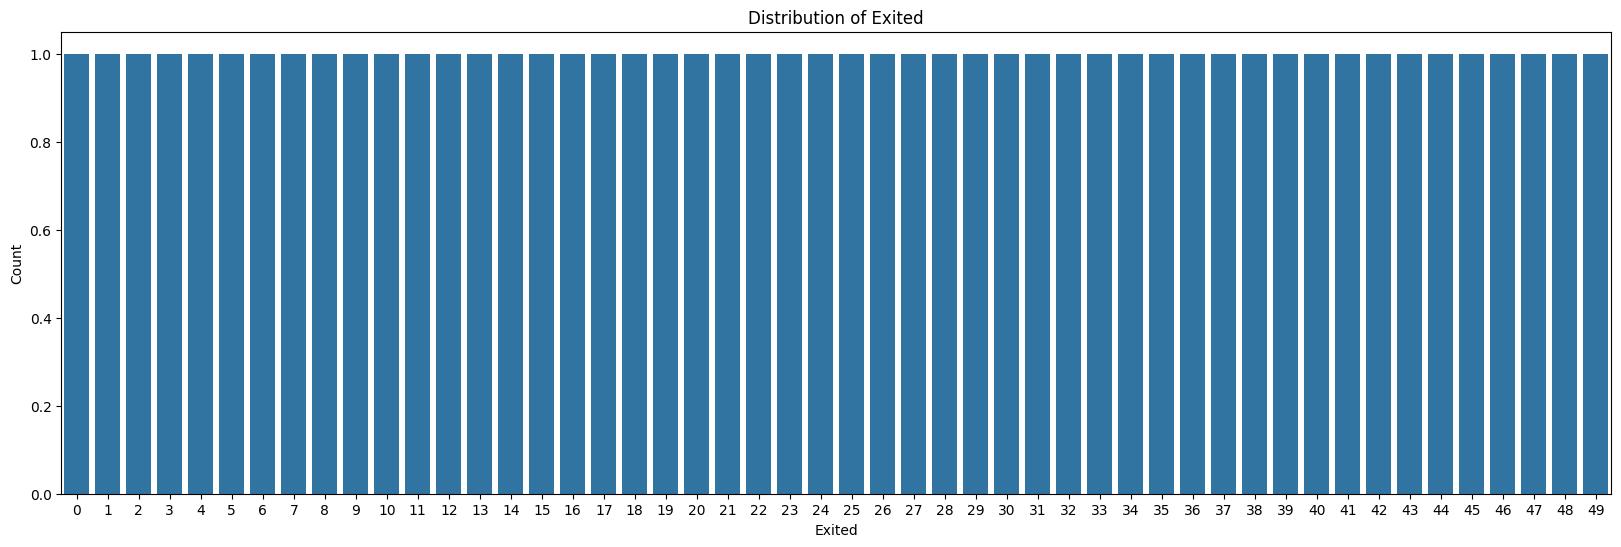

In [293]:
plt.figure(figsize=(20, 6))
sns.countplot(visualizing_data['Exited'])
plt.title('Distribution of Exited')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.show()

# **General Analysis** <br>
We want to analyze the dependency between the column "Exited" and the rest

Axes(0.125,0.11;0.775x0.77)
Text(0.5, 1.0, 'Exited in terms of CreditScore')


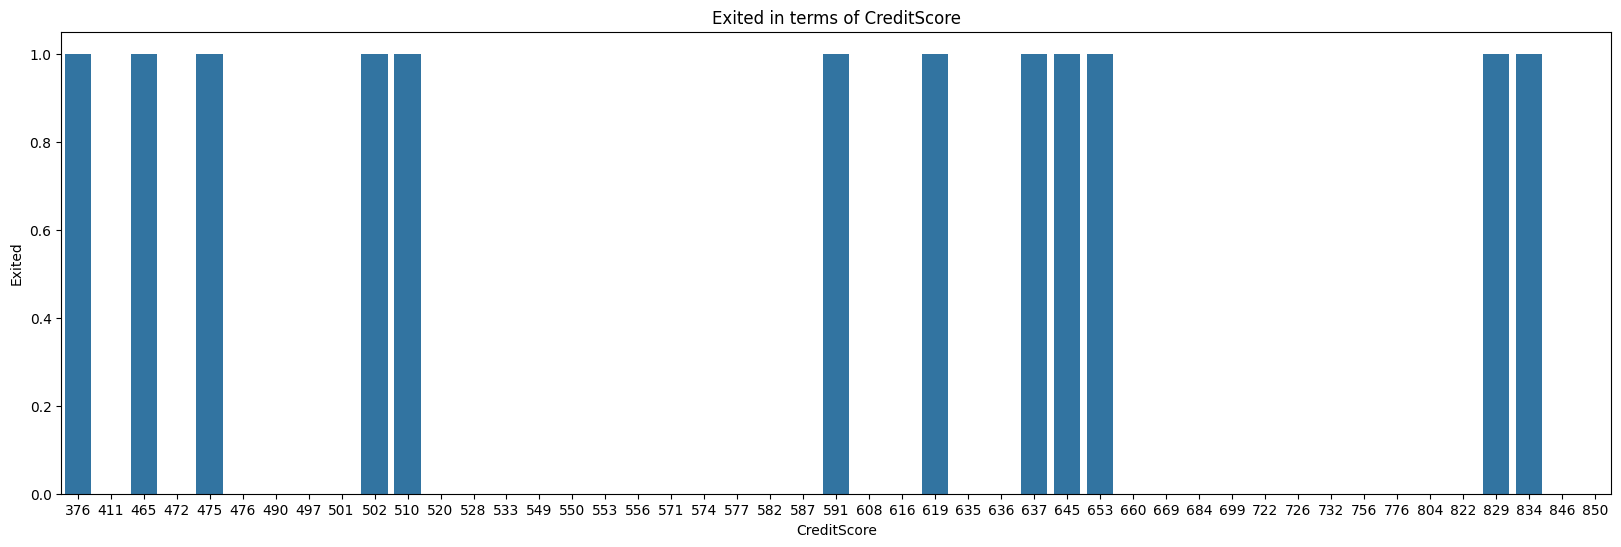

In [294]:
plt.figure(figsize = (20,6))
print(sns.barplot(x='CreditScore', y='Exited', data = visualizing_data))
print(plt.title('Exited in terms of CreditScore'))

Axes(0.125,0.11;0.775x0.77)
Text(0.5, 1.0, 'Exited in terms of Age')


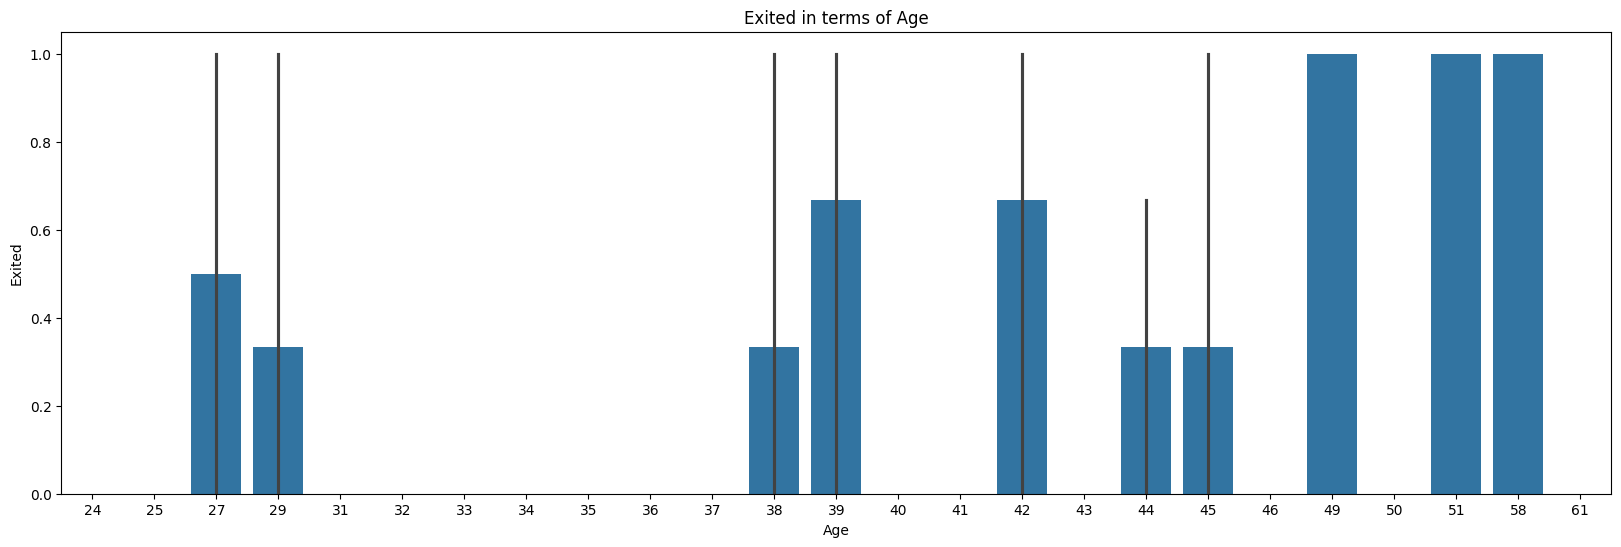

In [295]:
plt.figure(figsize = (20,6))
print(sns.barplot(x='Age', y='Exited', data = visualizing_data))
print(plt.title('Exited in terms of Age'))

Axes(0.125,0.11;0.775x0.77)
Text(0.5, 1.0, 'Exited in terms of Age')


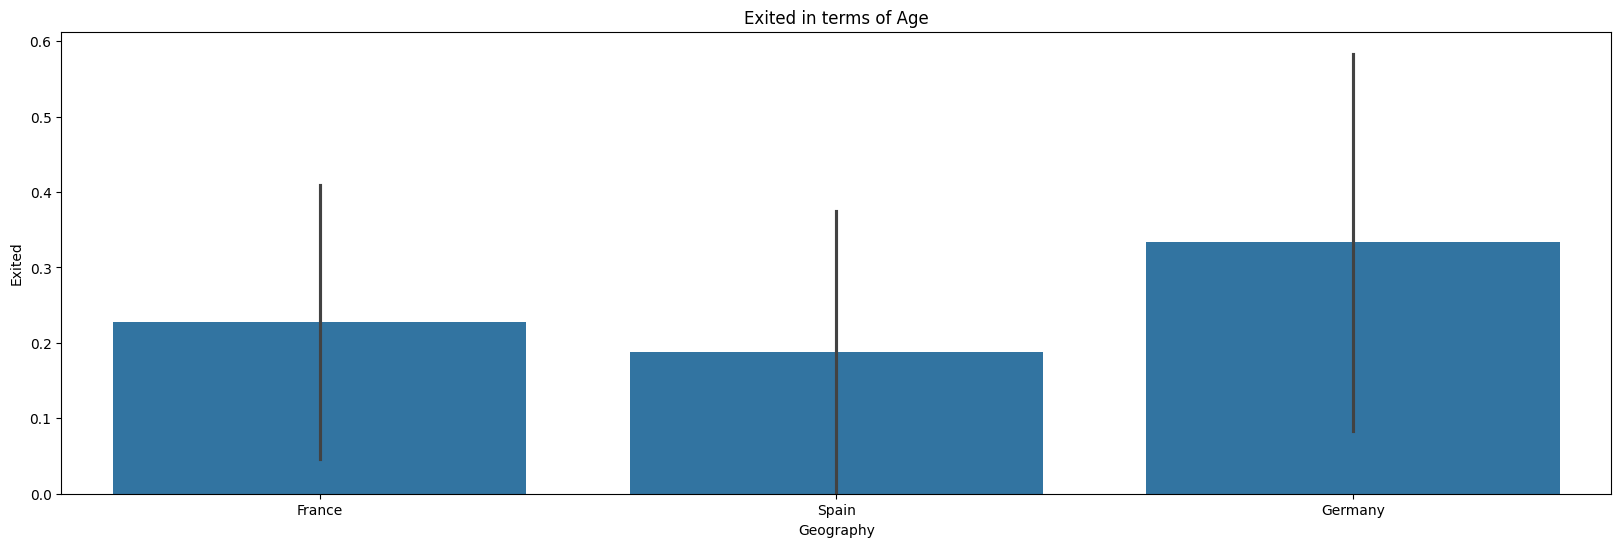

In [296]:
plt.figure(figsize = (20,6))
print(sns.barplot(x='Geography', y='Exited', data = visualizing_data))
print(plt.title('Exited in terms of Age'))

Axes(0.125,0.11;0.775x0.77)
Text(0.5, 1.0, 'Exited in terms of Geography')


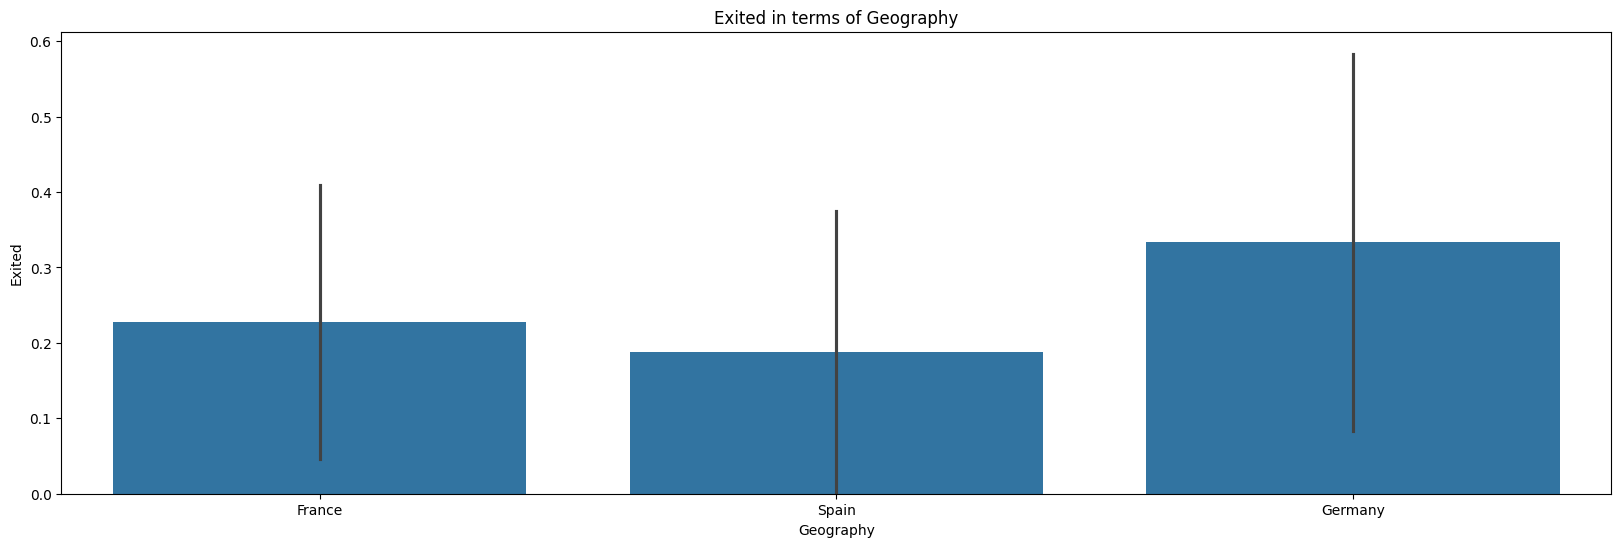

In [297]:
plt.figure(figsize = (20,6))
print(sns.barplot(x='Geography', y='Exited', data = visualizing_data))
print(plt.title('Exited in terms of Geography'))

Axes(0.125,0.11;0.775x0.77)
Text(0.5, 1.0, 'Exited in terms of Tenure')


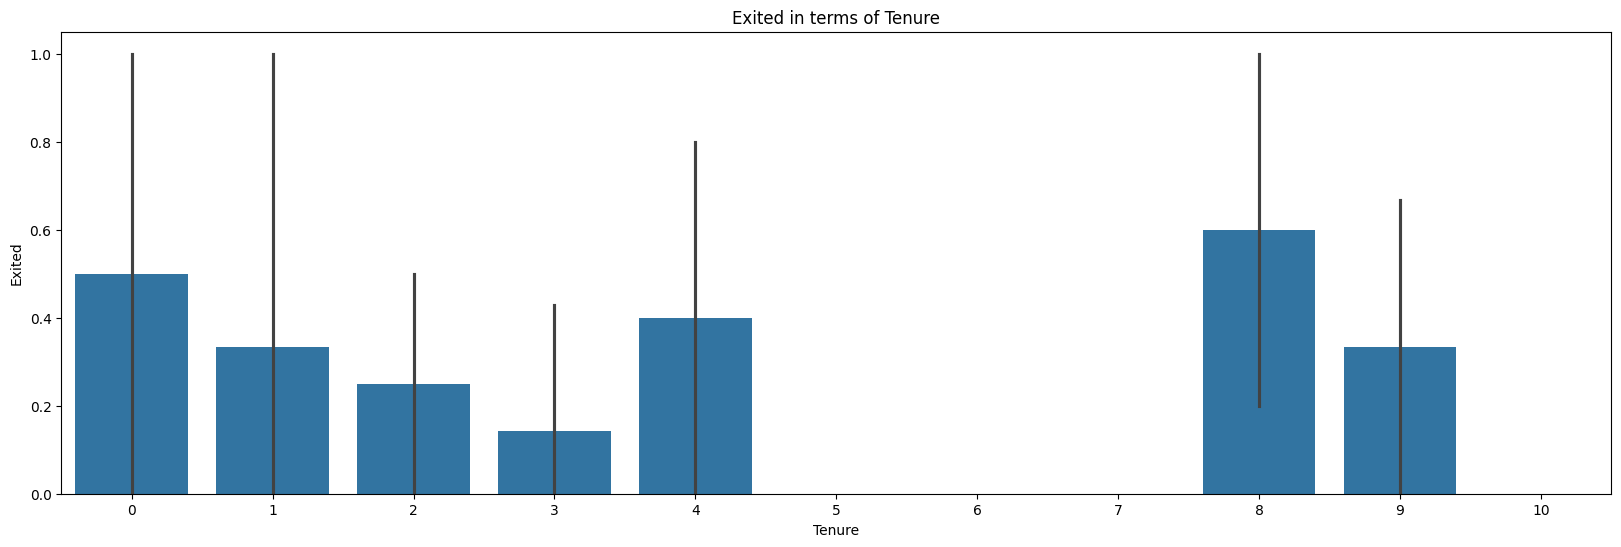

In [298]:
plt.figure(figsize = (20,6))
print(sns.barplot(x='Tenure', y='Exited', data = visualizing_data))
print(plt.title('Exited in terms of Tenure'))

Axes(0.125,0.11;0.775x0.77)
Text(0.5, 1.0, 'Exited in terms of Balance')


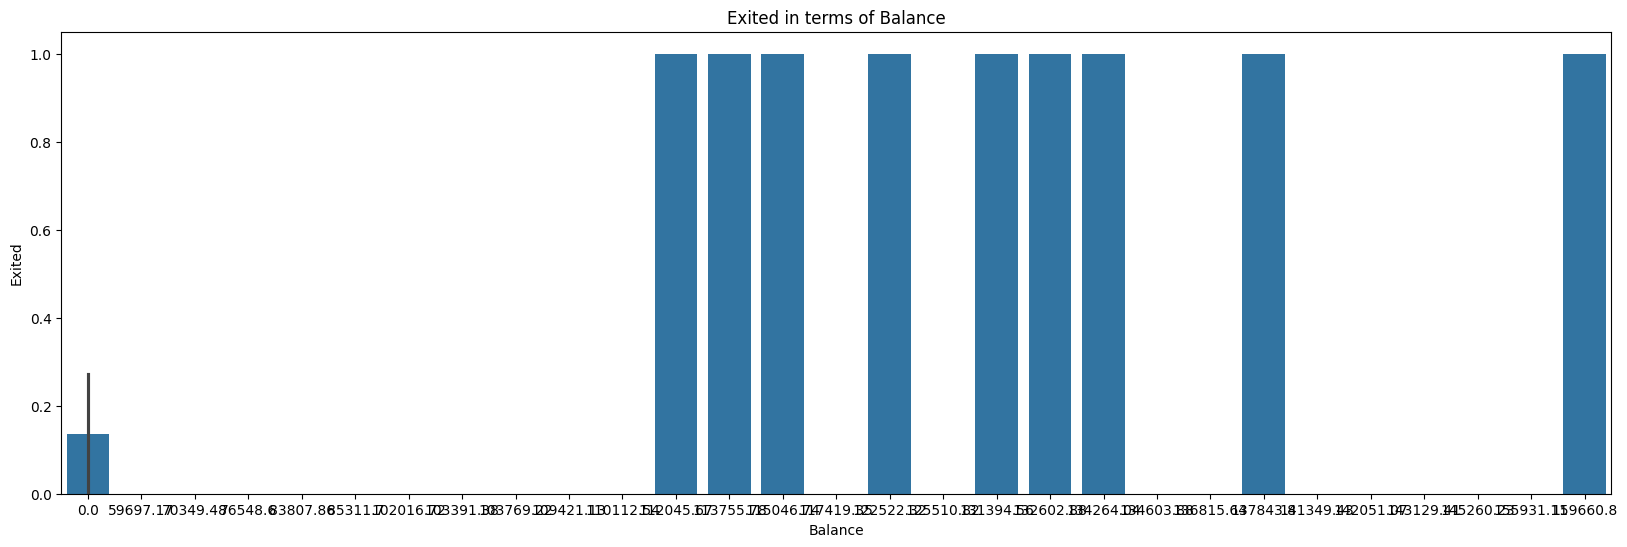

In [299]:
plt.figure(figsize = (20,6))
print(sns.barplot(x='Balance', y='Exited', data = visualizing_data))
print(plt.title('Exited in terms of Balance'))

Axes(0.125,0.11;0.775x0.77)
Text(0.5, 1.0, 'Exited in terms of NumOfProducts')


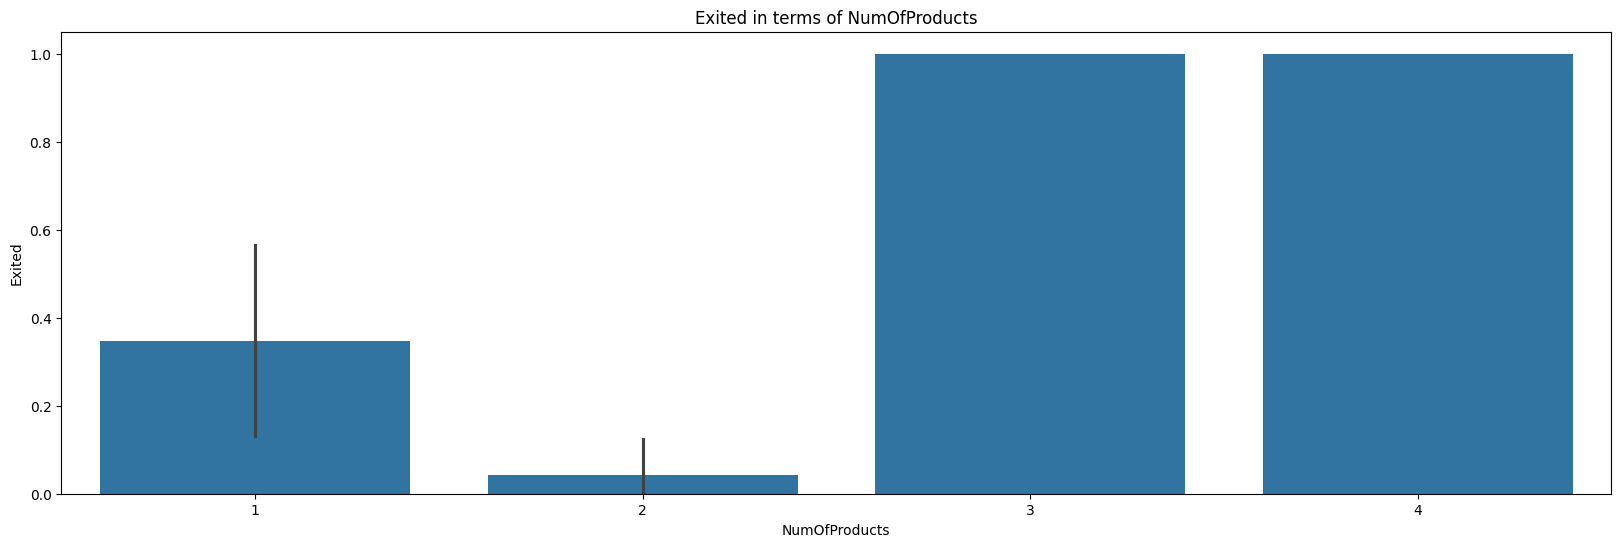

In [300]:
plt.figure(figsize = (20,6))
print(sns.barplot(x='NumOfProducts', y='Exited', data = visualizing_data))
print(plt.title('Exited in terms of NumOfProducts'))

Axes(0.125,0.11;0.775x0.77)
Text(0.5, 1.0, 'Exited in terms of HasCrCard')


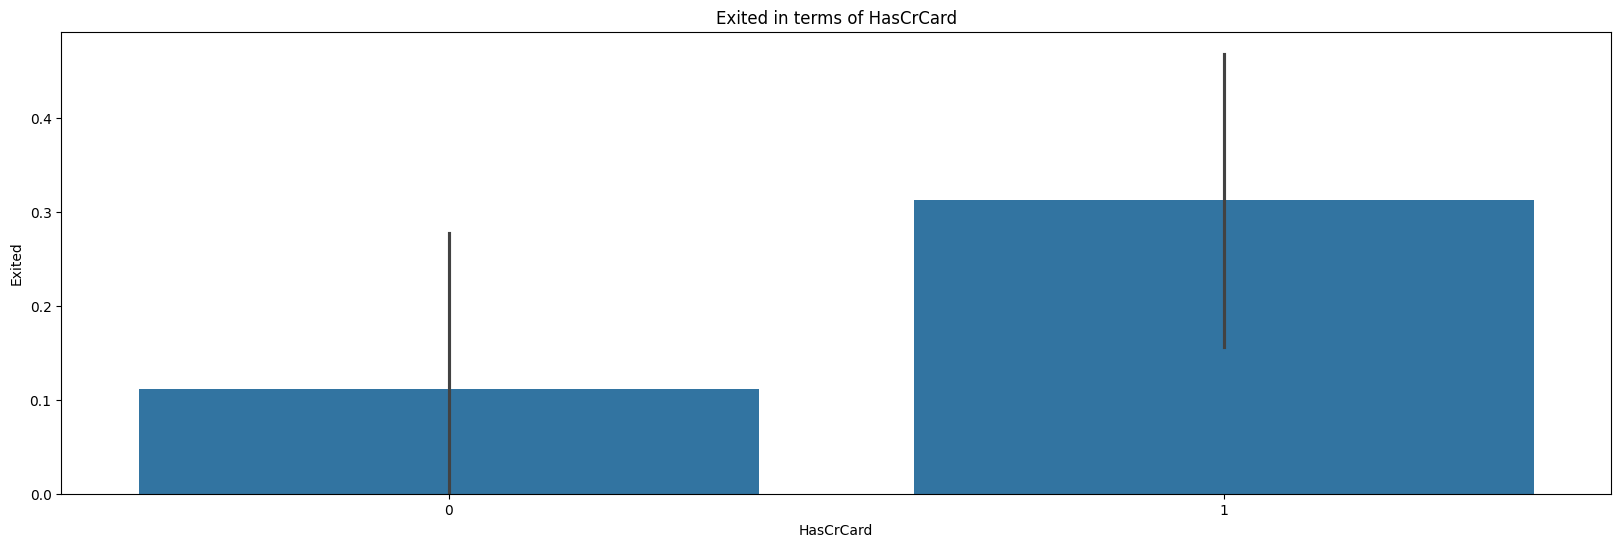

In [301]:
plt.figure(figsize = (20,6))
print(sns.barplot(x='HasCrCard', y='Exited', data = visualizing_data))
print(plt.title('Exited in terms of HasCrCard'))

Axes(0.125,0.11;0.775x0.77)
Text(0.5, 1.0, 'Exited in terms of IsActiveMember')


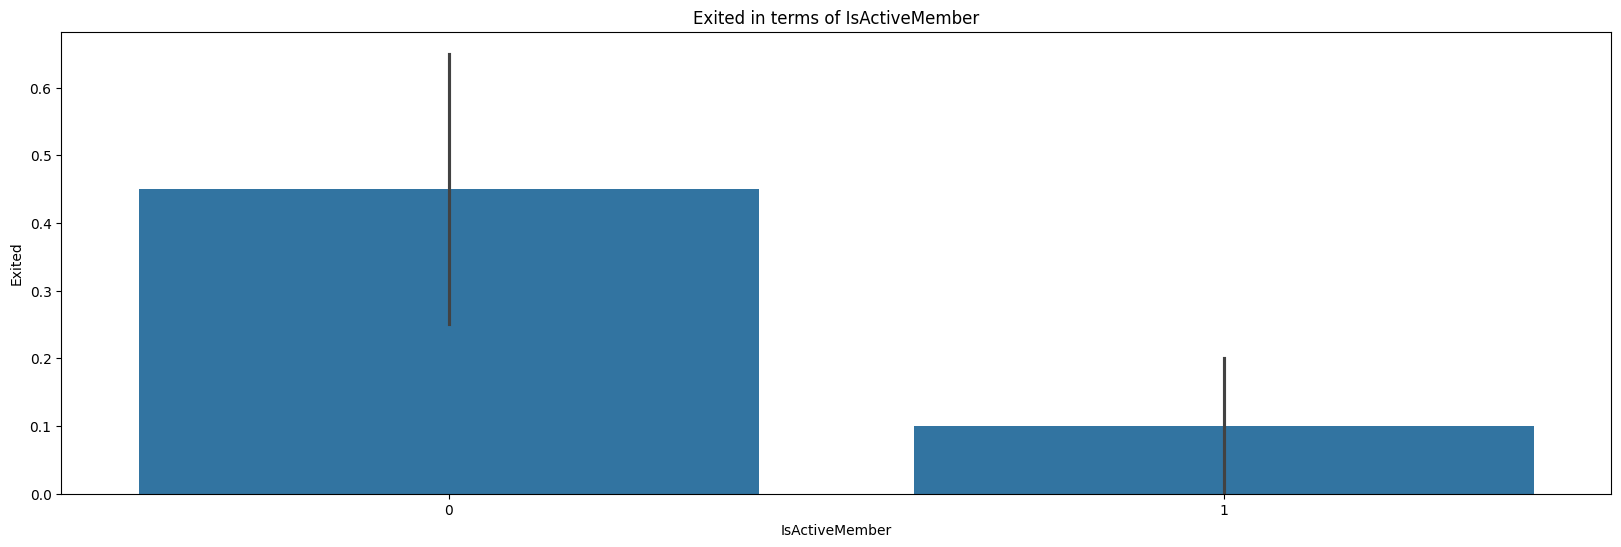

In [302]:
plt.figure(figsize = (20,6))
print(sns.barplot(x='IsActiveMember', y='Exited', data = visualizing_data))
print(plt.title('Exited in terms of IsActiveMember'))

Axes(0.125,0.11;0.775x0.77)
Text(0.5, 1.0, 'Exited in terms of EstimatedSalary')


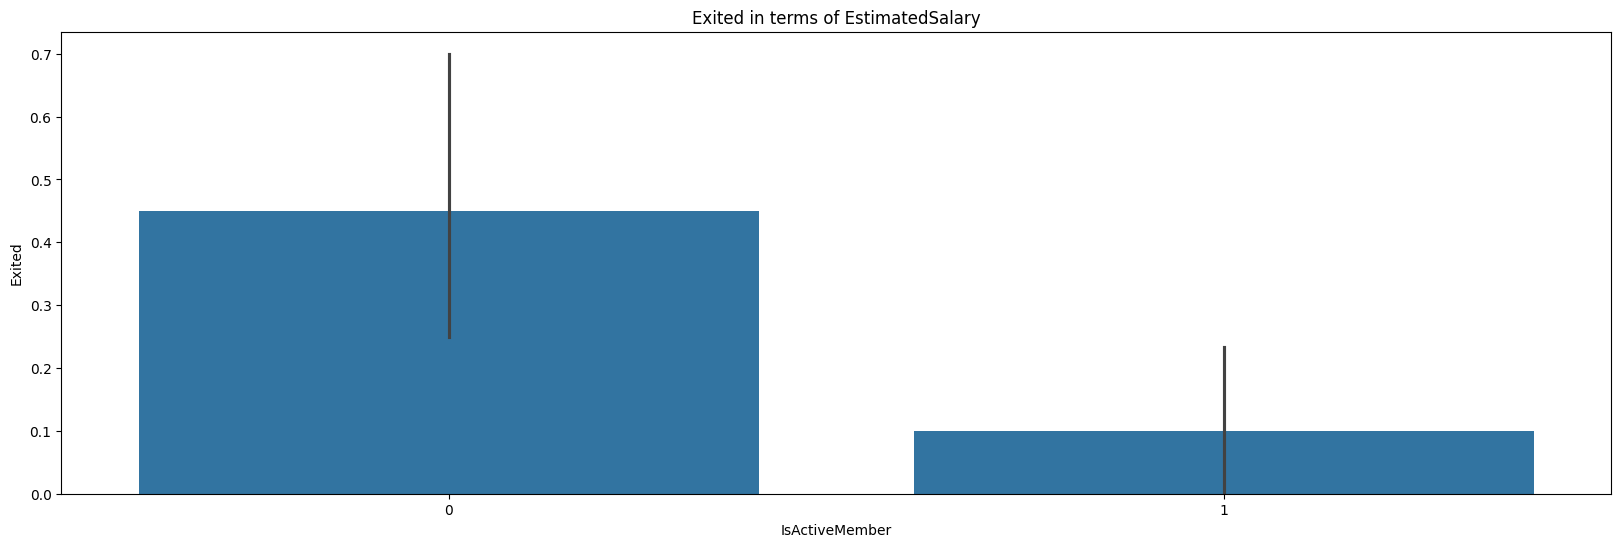

In [303]:
plt.figure(figsize = (20,6))
print(sns.barplot(x='IsActiveMember', y='Exited', data = visualizing_data))
print(plt.title('Exited in terms of EstimatedSalary'))

# **Logistic Regression Model**
We only make use of Columns "CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary", "Exited", "Geography", "Gender" for the analysis

**Encode categorical feature to int** <br> <br>
First, we need to convert the categorical columns to numerical. We can use get_dummies() or LabelEncoder(). However, since we don't know if different unique values in the categorical columns are ordinal or not. Therefore,  get_dummies() will be priortized to use in this case.

In [304]:
data = pd.get_dummies(data = data,drop_first=False).astype(int)


In [305]:
sc = StandardScaler()
data[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']] = sc.fit_transform(data[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']])
data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,-0.326221,0.293517,-1.041760,-1.225847,-0.911583,1,1,0.021880,1,1,0,0,1,0
1,-0.440036,0.198164,-1.387538,0.117342,-0.911583,0,1,0.216532,0,0,0,1,1,0
2,-1.536794,0.293517,1.032908,1.333050,2.527057,1,0,0.240686,1,1,0,0,1,0
3,0.501521,0.007457,-1.387538,-1.225847,0.807737,0,0,-0.108920,0,1,0,0,1,0
4,2.063884,0.388871,-1.041760,0.785723,-0.911583,1,1,-0.365269,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0.007457,-0.004426,-1.225847,0.807737,1,0,-0.066422,0,1,0,0,0,1
9996,-1.391939,-0.373958,1.724464,-0.306384,-0.911583,1,1,0.027983,0,1,0,0,0,1
9997,0.604988,-0.278604,0.687130,-1.225847,-0.911583,0,1,-1.008645,1,1,0,0,1,0
9998,1.256835,0.293517,-0.695982,-0.022607,0.807737,1,0,-0.125231,1,0,1,0,0,1


In [306]:
y = data["Exited"]
X = data.drop(["Exited"], axis=1)

**Target variable**

In [307]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int32

**Features**

In [308]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,-0.326221,0.293517,-1.041760,-1.225847,-0.911583,1,1,0.021880,1,0,0,1,0
1,-0.440036,0.198164,-1.387538,0.117342,-0.911583,0,1,0.216532,0,0,1,1,0
2,-1.536794,0.293517,1.032908,1.333050,2.527057,1,0,0.240686,1,0,0,1,0
3,0.501521,0.007457,-1.387538,-1.225847,0.807737,0,0,-0.108920,1,0,0,1,0
4,2.063884,0.388871,-1.041760,0.785723,-0.911583,1,1,-0.365269,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0.007457,-0.004426,-1.225847,0.807737,1,0,-0.066422,1,0,0,0,1
9996,-1.391939,-0.373958,1.724464,-0.306384,-0.911583,1,1,0.027983,1,0,0,0,1
9997,0.604988,-0.278604,0.687130,-1.225847,-0.911583,0,1,-1.008645,1,0,0,1,0
9998,1.256835,0.293517,-0.695982,-0.022607,0.807737,1,0,-0.125231,0,1,0,0,1


**Finding optimized parameters** <br>
The following lines of code will be used to evaluate the Logistic Regression to find the optimized arguments

In [331]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic_regression', LogisticRegression())
])

parameters = {
    'logistic_regression__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_search = GridSearchCV(pipeline, parameters, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best parameters:", best_params)

best_logistic_regression = grid_search.best_estimator_
best_logistic_regression.fit(X_train, y_train)

accuracy = best_logistic_regression.score(X_test, y_test)
print("Accuracy:", accuracy)

Best parameters: {'logistic_regression__C': 10}
Accuracy: 0.811


**Accuracy** <br>
The function score() is used to evaluate the performance of a trained model on a given dataset. The return value will be in the range from 0 to 1 and the higher score means that model is better in terms of performance. <br>

$$
Performance = score * 100 \%
$$

In [337]:
model = LogisticRegression(solver='lbfgs', max_iter=10000)
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
score

0.8115

In [311]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

**Mean Squared Error** <br>
The mean squared error indicate the average squared difference between the estimated values and the actual value. Below is the general equation to calculate the Mean Squared Error
$$
MSE = \frac{1}{n}\ \sum_{i=1}^n \left(y_i - \hat{y}_i \right)^2
$$
(where n is the no. of samples, $y_i$ is the predicted value, $\hat{y}_i$ is the input value)

In [312]:
MSE = mean_squared_error(y_test, y_pred)
MSE

0.1885

**Log Loss** <br>
Log Loss measures the amount of divergence of predicted probability with the actual label. Therefore, the lesser the log loss value, the more the perfectness of model

$$
LogLoss = \frac{-1}{n}\ \sum_{i=1}^n \sum_{k=1}^m x_{ik} * log(p_{ik})
$$
(where n is the no. of samples, m is the no. of attributes, $ x_{ik} $ indicates whether ith sample belongs to jth class or not, $p_{ij}$ indicates probability of ith sample belonging to jth class.)

In [313]:
print("Log Loss: ", metrics.log_loss(y, model.predict_proba(X)))
print("Error rate: ", 1 - metrics.accuracy_score(y, model.predict(X)))


Log Loss:  0.4281428984761335
Error rate:  0.18889999999999996


# **Decision Tree Model**


In [314]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tree_model = DecisionTreeClassifier()

**Finding optimized parameters** <br>
The following lines of code will be used to evaluate the Decision Tree Model to find the optimized arguments

In [323]:

tree_model = DecisionTreeClassifier()
parameters = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(tree_model, parameters, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best parameters:", best_params)

best_dt_classifier = DecisionTreeClassifier(**best_params)
best_dt_classifier.fit(X_train, y_train)

accuracy = best_dt_classifier.score(X_test, y_test)
accuracy

Best parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


0.858

**Model building** <br>
The actual arguments to build the model will be expressed below

In [316]:
tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

tree_model.fit(X_train, y_train)

classTreeModel = tree_model.fit(X, y)
print(export_text(classTreeModel, feature_names=X.columns.to_list()))

|--- Age <= 0.34
|   |--- NumOfProducts <= 1.67
|   |   |--- NumOfProducts <= -0.05
|   |   |   |--- Geography_Germany <= 0.50
|   |   |   |   |--- Balance <= -0.04
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Balance >  -0.04
|   |   |   |   |   |--- class: 0
|   |   |   |--- Geography_Germany >  0.50
|   |   |   |   |--- Balance <= 0.35
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Balance >  0.35
|   |   |   |   |   |--- class: 0
|   |   |--- NumOfProducts >  -0.05
|   |   |   |--- Balance <= -1.20
|   |   |   |   |--- Gender_Male <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Gender_Male >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- Balance >  -1.20
|   |   |   |   |--- Age <= -0.23
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Age >  -0.23
|   |   |   |   |   |--- class: 0
|   |--- NumOfProducts >  1.67
|   |   |--- Balance <= -0.33
|   |   |   |--- EstimatedSalary <= 1.17
|   |   |   |   |--- Age <= -0.14
|   |   |   |   | 

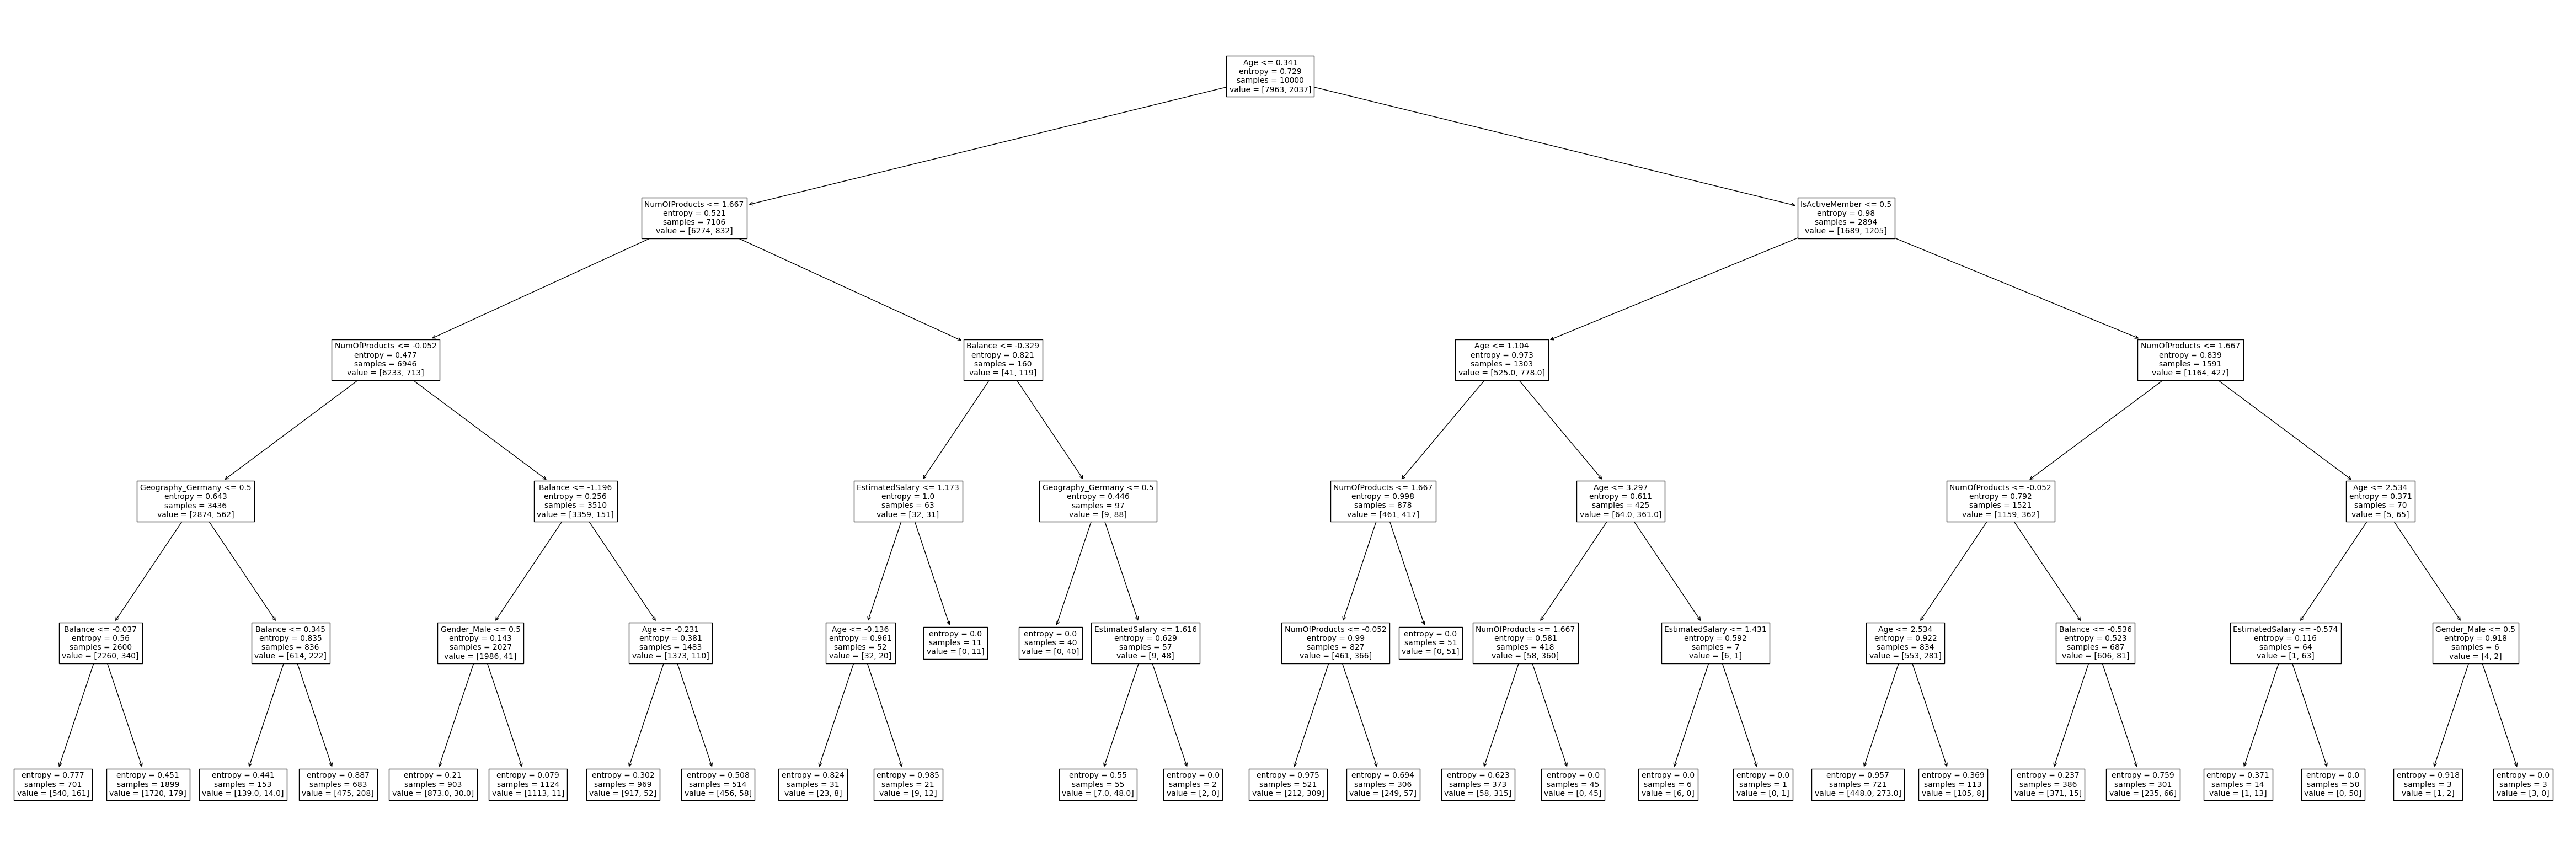

In [317]:
plt.figure(figsize=[60, 20])
tree.plot_tree(classTreeModel, feature_names=X.columns.to_list(), filled=False, fontsize=10)
# plt.savefig('images/decision_tree.pdf')
plt.show()

**Accuracy**

In [318]:
score = classTreeModel.score(X_test, y_test)
score

0.863

In [319]:
y_pred = classTreeModel.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

**Mean Squared Error** <br>


In [320]:
MSE = mean_squared_error(y_test, y_pred)
MSE

0.137

**Log Loss**

In [321]:
print("Log Loss: ", metrics.log_loss(y, classTreeModel.predict_proba(X)))
print("Error rate: ", 1 - metrics.accuracy_score(y, classTreeModel.predict(X)))


Log Loss:  0.34625173420790406
Error rate:  0.14280000000000004
